# Convolutional Neural Network(CNN) to detect cracks on surface
* Anish chaudhary(2019UCS2050)
* Sujal Monga(2019UCS2002)
* Jay Gupta(2019UCS2024)

## Problem statement
During manufacturing many products with brittle can get damaged on assembly line. Automating crack detection can save many man hours and save manufacturers considerable capital. 

## Problem solution
Automated crack detectors can be used on assembly lines to detect any damage during manufacturing. We can train a CNN to detect cracks and flag any damages.

## dataset used - [dataset](https://www.kaggle.com/arunrk7/surface-crack-detection)

## [click here to open kaggle notebook](https://www.kaggle.com/icecube27/ml-class-project)


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import PIL

In [2]:
print(tf.__version__)

2.6.0


Traninging data available in ../input/surface-crack-detection/ directory
* Negative examples - ../input/surface-crack-detection/Negative
* Positive examples - ../input/surface-crack-detection/Positive

In [3]:
import pathlib
data_dir = pathlib.Path('./data/')
paths = list(data_dir.glob('**/*.jpg'))
no_images = len(paths)
print("no of images: " + str(no_images))

no of images: 40000


In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(100, 100),
    batch_size=64
)
val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(100, 100),
    batch_size=64
)
class_names = train_ds.class_names

Found 40000 files belonging to 2 classes.
Using 32000 files for training.
Found 40000 files belonging to 2 classes.
Using 8000 files for validation.


displaying some images


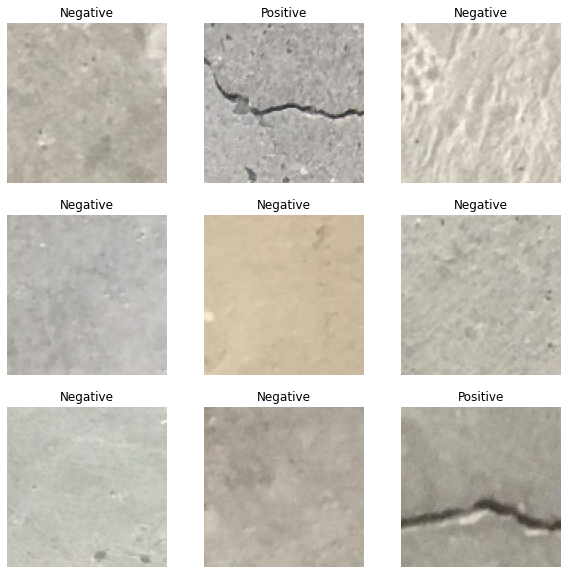

In [5]:
print("displaying some images")
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(100,100,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                6

In [7]:
epochs = 2
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/2
500/500 [==============================] - 460s 918ms/step - loss: 0.8155 - accuracy: 0.5722 - val_loss: 0.6906 - val_accuracy: 0.6110
Epoch 2/2
500/500 [==============================] - 439s 877ms/step - loss: 0.3685 - accuracy: 0.8961 - val_loss: 0.1040 - val_accuracy: 0.9710


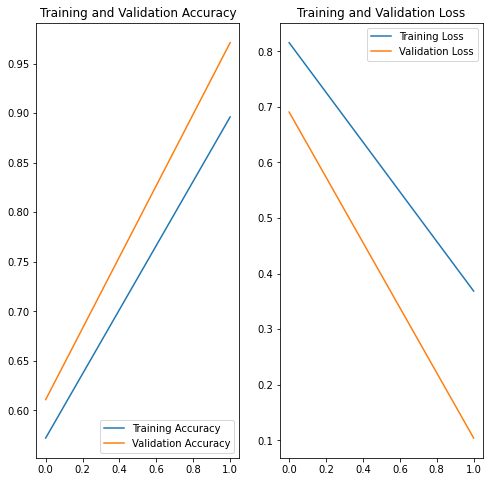

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

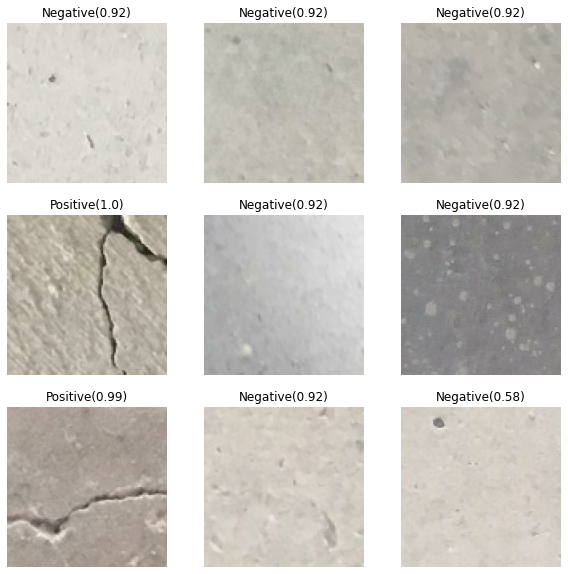

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        img_array = tf.expand_dims(images[i].numpy().astype("uint8"), 0) # Create a batch
        predictions = model.predict(img_array)
        
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

        if predictions[0] < 0.5:
            plt.title("Negative(" + str(1 - predictions[0][0])[:4] + ")")
        else:
            plt.title("Positive(" + str(predictions[0][0])[:4] + ")")